# Digit Recognizer from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)
print(data.dtype)
print(type(data))
print(data)

int64
<class 'numpy.ndarray'>
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [5]:
data.shape

(42000, 785)

In [6]:
np.random.shuffle(data)
m,n= data.shape

training_data=data[0:1000].T
train_X= training_data[1:n]
train_y= training_data[0]
train_X= train_X/255

validation_data= data[1000:m].T
valid_X= validation_data[1:n]
valid_y= validation_data[0]
valid_X= valid_X/255

In [7]:
train_y

array([0, 2, 2, 0, 7, 8, 8, 4, 8, 3, 8, 7, 6, 8, 7, 7, 2, 1, 3, 5, 4, 7,
       6, 0, 6, 9, 4, 2, 9, 3, 1, 5, 9, 9, 1, 0, 3, 8, 9, 4, 2, 7, 1, 7,
       1, 4, 5, 6, 2, 3, 7, 5, 3, 1, 4, 8, 7, 5, 3, 4, 0, 4, 4, 8, 9, 0,
       9, 5, 4, 1, 9, 0, 3, 3, 7, 2, 9, 7, 9, 5, 0, 1, 4, 9, 5, 1, 7, 4,
       7, 1, 9, 1, 1, 8, 6, 8, 1, 2, 6, 1, 7, 9, 8, 5, 7, 9, 1, 3, 6, 9,
       5, 8, 2, 3, 6, 9, 8, 9, 7, 3, 4, 7, 9, 4, 7, 1, 1, 7, 1, 6, 9, 3,
       7, 8, 6, 3, 5, 5, 1, 3, 3, 2, 5, 0, 6, 3, 9, 2, 9, 8, 0, 3, 4, 4,
       3, 0, 2, 6, 8, 9, 4, 7, 6, 8, 4, 3, 5, 6, 2, 0, 3, 4, 8, 3, 2, 8,
       2, 0, 4, 3, 4, 2, 8, 1, 9, 5, 7, 7, 5, 6, 8, 7, 9, 5, 5, 4, 1, 2,
       9, 3, 2, 9, 3, 9, 7, 9, 0, 3, 1, 5, 5, 1, 3, 6, 1, 8, 0, 1, 1, 1,
       8, 0, 6, 8, 7, 1, 0, 9, 1, 2, 0, 0, 9, 2, 0, 2, 9, 1, 6, 4, 3, 6,
       2, 2, 4, 3, 0, 1, 8, 9, 6, 4, 2, 3, 2, 6, 3, 2, 1, 6, 4, 2, 8, 9,
       0, 8, 0, 4, 4, 6, 4, 2, 4, 8, 2, 7, 6, 1, 1, 0, 1, 6, 2, 0, 0, 0,
       6, 5, 7, 3, 4, 5, 2, 4, 6, 8, 9, 6, 9, 1, 9,

In [8]:
def initialize_params():
    w1= np.random.rand(10, 784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2= np.random.rand(10, 10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1, b1, w2, b2

def reLU(z):
    return np.maximum(z,0)

def softmax(z):
    A= np.exp(z)/sum(np.exp(z))
    return A

def forward_prop(w1, b1, w2, b2, X):
    z1= w1.dot(X)+ b1
    a1= reLU(z1)
    z2= w2.dot(a1)+b2
    a2= softmax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y= np.zeros((y.size, y.max()+1))
    one_hot_y[np.arange(y.size), y]=1
    one_hot_y= one_hot_y.T
    return one_hot_y

def deriv_reLU(z):
    return z>0

def backward_prop(z1, a1, z2, a2, w1, w2, x, y):
    one_hot_y= one_hot(y)
    dz2= a2-one_hot_y
    dw2= 1/m* dz2.dot(a1.T)
    db2= 1/m*np.sum(dz2)
    dz1= w2.T.dot(dz2)*deriv_reLU(z1)
    dw1= 1/m*dz1.dot(x.T)
    db1= 1/m*np.sum(dz1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1= w1- alpha * dw1
    b1= b1- alpha * db1
    w2= w2- alpha * dw2
    b2= b2- alpha * db2
    return w1, b1, w2, b2

In [9]:
def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions, y):
    print(predictions,y)
    return np.sum(predictions==y)/y.size

def gradient_descent(x, y, alpha, iterations):
    w1, b1, w2, b2 = initialize_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2= backward_prop(z1, a1, z2, a2, w1, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(a2)
            print(get_accuracy(predictions, y))
    return w1, b1, w2, b2

In [10]:
w1, b1, w2, b2= gradient_descent(train_X, train_y, 0.10, 500)

Iteration:  0
[2 5 2 2 4 6 6 9 6 8 6 4 9 6 4 6 9 8 8 8 8 4 8 8 8 5 5 6 4 4 4 8 4 8 6 8 9
 9 0 6 4 5 8 4 4 8 8 9 9 8 4 4 2 6 5 8 5 4 8 9 2 8 6 8 4 8 5 8 6 8 8 2 8 9
 4 2 4 2 4 8 9 4 6 9 8 8 5 4 4 4 6 8 8 8 6 8 4 2 8 4 4 4 8 6 4 9 6 6 9 4 0
 6 4 6 8 9 6 4 4 5 8 6 5 9 8 4 8 5 8 8 5 8 5 6 5 8 8 6 4 1 9 0 4 9 6 8 4 9
 6 9 0 4 6 9 2 2 4 8 9 4 5 6 5 8 4 6 4 8 4 8 6 6 2 4 4 6 6 8 8 8 6 6 4 8 4
 8 2 4 6 2 8 5 4 9 8 8 4 9 4 8 8 5 6 8 2 8 8 4 4 8 9 4 0 6 1 8 2 6 8 4 8 2
 8 4 4 4 8 5 6 8 2 5 4 6 2 9 4 8 8 6 9 6 9 6 9 9 8 1 9 8 9 5 6 8 4 6 2 5 8
 8 6 9 6 4 8 6 8 5 5 9 4 9 4 9 8 5 5 8 4 2 8 8 9 0 4 8 6 4 4 9 8 8 8 6 9 9
 6 0 5 4 9 8 6 8 6 8 8 6 5 8 8 2 9 6 6 2 4 5 4 4 6 8 4 4 8 6 5 6 8 9 4 8 8
 6 8 8 0 5 9 8 4 8 0 8 2 6 6 4 8 8 6 4 6 8 5 4 8 9 6 8 8 9 8 4 8 6 4 6 0 8
 4 2 8 4 8 5 4 8 4 8 9 4 4 4 6 8 2 5 4 5 4 8 8 6 5 8 5 9 6 8 9 8 4 4 6 9 4
 6 8 9 8 4 8 5 8 8 2 4 5 8 8 4 5 5 8 5 9 8 4 4 4 6 0 6 9 6 8 5 2 8 8 8 8 6
 6 8 5 8 4 2 4 4 8 6 6 2 8 8 8 4 4 8 8 8 4 2 8 5 9 8 6 4 8 8 8 6 5 5 8 6 6
 6 4 8 4 6 

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = train_X[:, index, None]
    prediction = make_predictions(train_X[:, index, None], W1, b1, W2, b2)
    label = train_y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  0


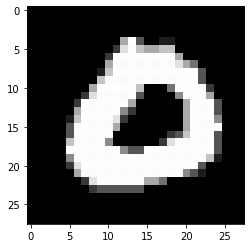

Prediction:  [5]
Label:  2


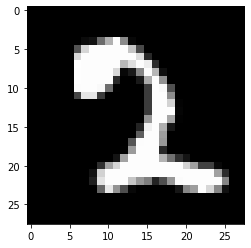

Prediction:  [4]
Label:  2


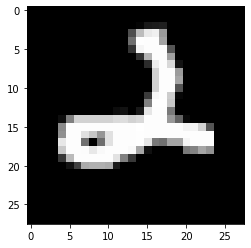

Prediction:  [6]
Label:  0


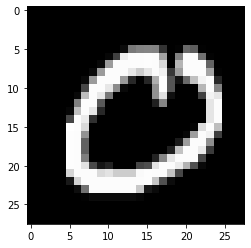

In [12]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [13]:
dev_predictions = make_predictions(valid_X, w1, b1, w2, b2)
get_accuracy(dev_predictions, valid_y)

[6 4 8 ... 6 6 9] [9 0 1 ... 9 5 8]


0.1664878048780488